In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

In [7]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/lenna.png')
img = 0.289*img[:,:,0] + 0.587*img[:,:,1] + 0.114*img[:,:,2]
img = img.astype(np.uint8)
width = img.shape[0]
height = img.shape[1]
size = width*height

In [8]:
def Hist(img):
  width = img.shape[0]
  height = img.shape[1]
  H = np.zeros(shape = (256,1))
  for i in range(width):
    for j in range(height):
      k = img[i,j]
      H[k,0] = H[k,0]+1
  return H

In [9]:
histg = Hist(img)
x = histg.reshape(1,256)
y = np.array([])
y = np.append(y, x[0,0])
for i in range(255):
  k = x[0, i+1] + y[i]
  y= np.append(y,k)
y = np.round((y/size)*255)

hist_equal = np.zeros(shape = (512,512))
for i in range(width):
  for j in range(height):
    k = img[i,j]
    hist_equal[i,j] = y[k]

(<matplotlib.axes._subplots.AxesSubplot at 0x7f24a82597d0>,
 Text(0.5, 1.0, 'After equlization'),
 (-0.5, 511.5, 511.5, -0.5))

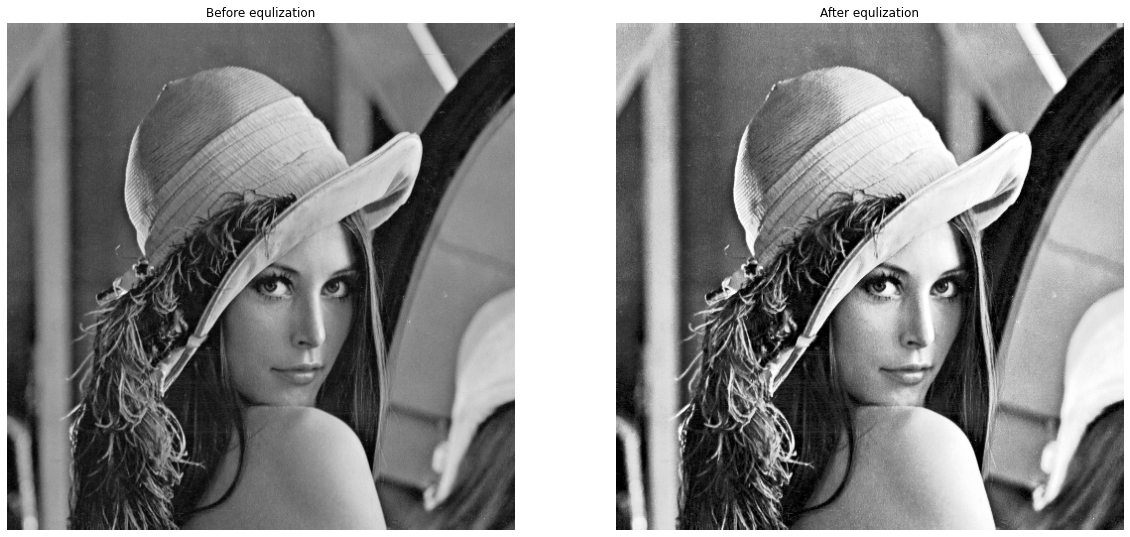

In [10]:
plt.figure(figsize = (20,20))
plt.subplot(121), plt.imshow(img, cmap = 'gray'), plt.title("Before equlization"), plt.axis('off')
plt.subplot(122), plt.imshow(hist_equal, cmap = 'gray'), plt.title("After equlization"), plt.axis('off')

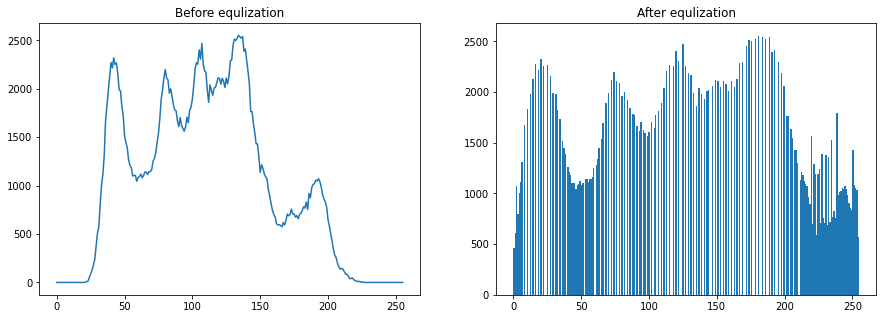

In [18]:
plt.figure(figsize = (15,5))
plt.subplot(121),plt.plot(histg), plt.title("Before equlization")
plt.subplot(122),plt.hist(hist_equal.ravel(), 256, [0,255]), plt.title("After equlization")
plt.show()